**DATA DIRI**<br>
Nama: Kokoh Dwiko Listanto<br>
Username: kokoh_2307<br>
Email: kokohdwikolistanto@gmail.com

In [1]:
# mengimport data set
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-23 02:52:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.38MB/s    in 38s     

2021-04-23 02:53:38 (8.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# mengimport library yang dibutuhkan
import tensorflow as tf
#untuk mengetahui versi tensorflow
print(tf.__version__)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

2.4.1


In [9]:
#melakukan ekstrasi dataset pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [10]:
#mengecek direktori
os.listdir('/tmp/rockpaperscissors')

['scissors', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [19]:
base_dir = "/tmp/rockpaperscissors/rps-cv-images"

In [20]:
batu_dir = os.path.join(base_dir, 'rock')
train_batu_dir, val_batu_dir = train_test_split(os.listdir(batu_dir), test_size=0.4, train_size=0.6)
kertas_dir = os.path.join(base_dir, 'paper')
train_kertas_dir, val_kertas_dir = train_test_split(os.listdir(kertas_dir), test_size=0.4, train_size=0.6)
gunting_dir = os.path.join(base_dir, 'scissors')
train_gunting_dir, val_gunting_dir = train_test_split(os.listdir(gunting_dir), test_size=0.4, train_size=0.6)

print('total gambar batu: ', len(os.listdir(batu_dir)))
print('total gambar kertas: ', len(os.listdir(kertas_dir)))
print('total gambar gunting: ', len(os.listdir(gunting_dir)))

total gambar batu:  726
total gambar kertas:  712
total gambar gunting:  750


In [21]:
#augmentasi  & image generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode='nearest',
    validation_split = 0.4
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 32
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation',
    batch_size = 32
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        7

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [27]:
Model1 = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      )

Epoch 1/20
25/25 - 15s - loss: 0.0791 - accuracy: 0.9818 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 2/20
25/25 - 15s - loss: 0.0718 - accuracy: 0.9762 - val_loss: 0.0779 - val_accuracy: 0.9625
Epoch 3/20
25/25 - 15s - loss: 0.0912 - accuracy: 0.9650 - val_loss: 0.0660 - val_accuracy: 0.9625
Epoch 4/20
25/25 - 14s - loss: 0.0789 - accuracy: 0.9727 - val_loss: 0.0625 - val_accuracy: 0.9750
Epoch 5/20
25/25 - 14s - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.0274 - val_accuracy: 0.9875
Epoch 6/20
25/25 - 15s - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.0616 - val_accuracy: 0.9875
Epoch 7/20
25/25 - 14s - loss: 0.0422 - accuracy: 0.9857 - val_loss: 0.0427 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 14s - loss: 0.0532 - accuracy: 0.9792 - val_loss: 0.0233 - val_accuracy: 0.9937
Epoch 9/20
25/25 - 14s - loss: 0.0383 - accuracy: 0.9831 - val_loss: 0.0823 - val_accuracy: 0.9812
Epoch 10/20
25/25 - 15s - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.2146 - val_accuracy: 0.9500
Epoch 11/

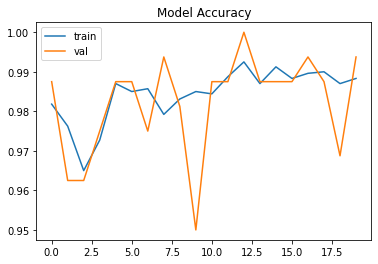

<Figure size 432x288 with 0 Axes>

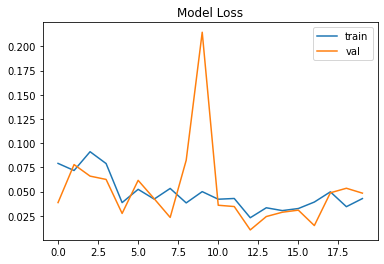

<Figure size 432x288 with 0 Axes>

In [31]:
#accuracy
plt.plot(Model1.history['accuracy'])
plt.plot(Model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train','val'],loc=0)
plt.figure()
plt.show()

#loss
plt.plot(Model1.history['loss'])
plt.plot(Model1.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train','val'],loc=0)
plt.figure()
plt.show()

Saving download (7).jpg to download (7).jpg
download (7).jpg
AKU ADALAH GUNTING


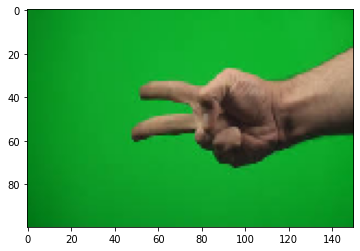

In [32]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('AKU ADALAH KERTAS')
    elif classes[0][1] == 1:
        print('AKU ADALAH BATU')
    elif classes[0][2] == 1:
        print('AKU ADALAH GUNTING')